**AIM:FORD MOTORS STOCK PRICE PREDICTION**


**import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas_datareader as pdr
key="82cddcd0b39a35ff5d26792909159181d391e013"

**Load data**

Start date and end date to get the data

In [ ]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
df = pdr.get_data_tiingo('F', api_key=key,start=start,end=end)

In [ ]:
#get train data
train = df.iloc[:, 1:2].values

In [ ]:
#apply min-max sc
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

**Creating Data with Timestamps**
 
LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 100 timesteps and converting it into an array using NumPy. Next, we convert the data into a 3D dimension array with X_train samples, 100 timestamps, and one feature at each step(KD NUGGET)

In [ ]:
X = []
y = []
for i in range(100, 1482):
    X.append(train_scaled[i-100:i, 0])
    y.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**LSTM Model**

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
44/44 [==============================] - 11s 134ms/step - loss: 0.1055
Epoch 2/10
44/44 [==============================] - 6s 138ms/step - loss: 0.0047
Epoch 3/10
44/44 [==============================] - 6s 138ms/step - loss: 0.0030
Epoc

**Prediction with test data**

In [ ]:
#get the test data
start = dt.datetime(2018,12,31)
end = dt.datetime(2020,12,31)
test = pdr.get_data_tiingo('F', api_key=key,start=start,end=end)

In [ ]:
#get the high
y_test = test.iloc[:, 1].values

In [ ]:
print(y_test[0])

7.86


In [ ]:
len(test)

506

In [ ]:
#prepare the test data the same way we prepared the train data and make prediction
dataset_total = pd.concat((df['open'], test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 100:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100, 606):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

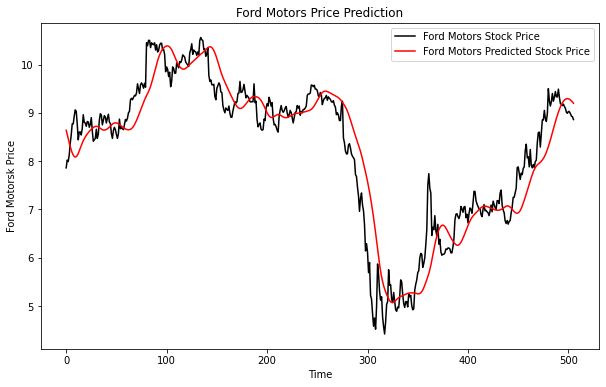

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test, color = 'black', label = 'Ford Motors Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Ford Motors Predicted Stock Price')
plt.title('Ford Motors Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ford Motorsk Price')
plt.legend()
plt.show()

In [ ]:
len(predicted_stock_price),len(y_test)

(506, 506)

In [ ]:
x = X_test[-1]
print(len(x))

100


In [ ]:
#make prediction for next 30 days
x = X_test[-1]
num_timesteps = 130
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = regressor.predict(data)
    prediction = sc.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds[-30:])

[29.77165, 29.766588, 29.759441, 29.749819, 29.738523, 29.727854, 29.719706, 29.714245, 29.710796, 29.708645, 29.707298, 29.706469, 29.705948, 29.70563, 29.705435, 29.705318, 29.705252, 29.705214, 29.705189, 29.705172, 29.705156, 29.705147, 29.70513, 29.705107, 29.705086, 29.705063, 29.70505, 29.705025, 29.705004, 29.70498]
